In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# read in the Kessler Objects of Interest (KOI) dataset
# the first 53 lines are description
df = pd.read_csv('../data/koi.csv', skiprows=53)
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


Making an assumption here that "CANDIDATE" doesn't tell us very much.
We want to train a model to predict whether a row will be "CONFIRMED" or a "FALSE POSITIVE"

In [62]:
# remove the "CANDIDATE" rows
df = df[df['koi_disposition'] != 'CANDIDATE']


We want to try and use the information we have about the exoplanet to predict the **koi_pdisposition** field.

In [63]:
# these are the columns we are interested in using
X = df[['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag']]

# replace missing values with the mean of the column
X = X.fillna(X.mean())

# we want to predict if the disposition is CONFIRMED
y = df['koi_disposition'] == 'CONFIRMED'


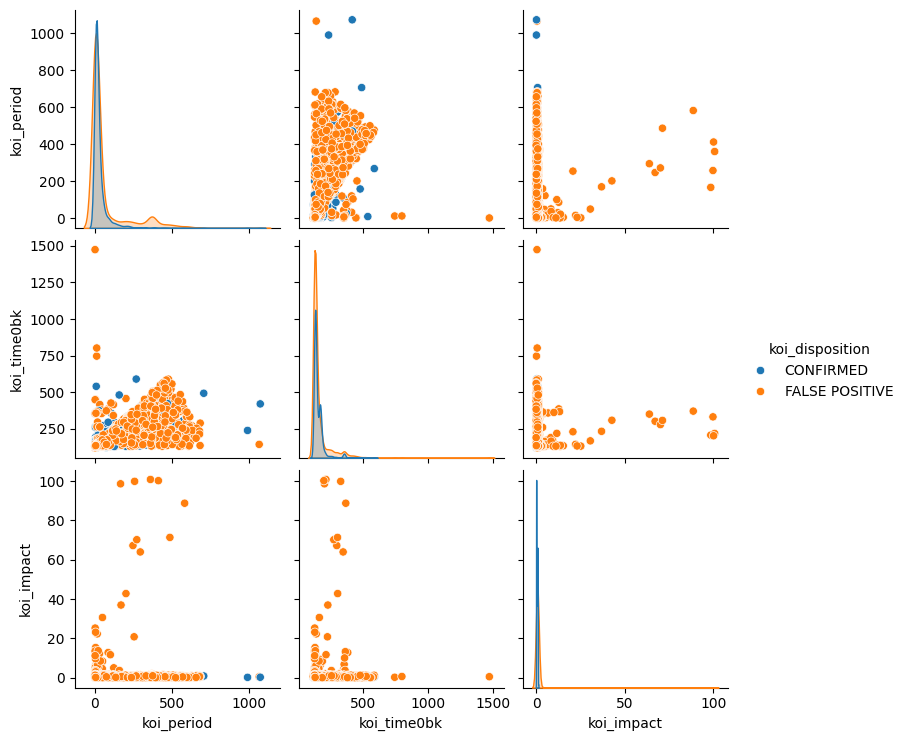

In [64]:
sns.pairplot(df, vars=['koi_period', 'koi_time0bk', 'koi_impact'], hue='koi_disposition')


(0.0, 1000.0)

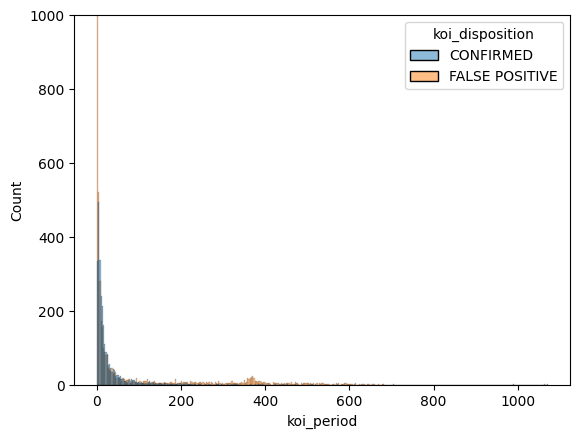

In [65]:
sns.histplot(data=df, x = 'koi_period', hue='koi_disposition', kde=False, fill=True)
plt.ylim(0, 1000)

In [66]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [67]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_r2_score = lr_model.score(X_test, y_test)
print(f'Linear Regression R^2 score: {lr_r2_score}')

Linear Regression R^2 score: 0.27554487021859275
